# import pakages

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

In [53]:
!pip install -U jupyter
!pip3 install numpy==1.16.4
!pip install --upgrade pip
!pip3 install -U seaborn==0.9.0
!pip install pandasql
!pip install pymongo
import pandas as pd 
import seaborn as sns
import matplotlib as plt
import math
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pandas as pd
from numpy import mean
from numpy import std
from pandas import DataFrame
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# Pandas, and NumPy: 
import numpy as np
import pandas as pd
from time import time


# Import the required libraries

import pymongo
import datetime
import collections

import scipy.stats
import matplotlib.pyplot as plt

  Using cached numpy-1.16.4.zip (5.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for numpy
Failed to build numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Running setup.py install for numpy: started
  Running setup.py install for numpy: finished with status 'error'
  Rolling back uninstall of numpy
  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy-1.20.3.dist-info\
   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy-1.20.3.dist-info
  Moving to c:\users\ajarir\anaconda3\lib\site-packages\numpy\
   from C:\Users\ajarir\anaconda3\Lib\site-packages\~umpy
  Moving to c:\users\ajarir\anaconda3\scripts\f2py-script.py
   from C:\Users\ajarir\AppData\Local\Temp\pip-uninstall-0_8u8gfb\f2py-script.py
  Moving to c:\users\ajarir\anaconda3\scripts\f2py.exe
   from C:\Users\ajarir\AppDa

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [264 lines of output]
  Running from numpy source directory.
  C:\Users\ajarir\AppData\Local\Temp\pip-install-3yl29ztu\numpy_d7b36a70d9484a84bc132f1fbf4df9c4\numpy\distutils\misc_util.py:476: SyntaxWarning: "is" with a literal. Did you mean "=="?
    return is_string(s) and ('*' in s or '?' is s)
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries blis not found in ['C:\\Users\\ajarir\\anaconda3\\lib', 'C:\\', 'C:\\Users\\ajarir\\anaconda3\\libs']
    NOT AVAILABLE
  
  openblas_info:
  No module

     ---------------------------------------- 2.1/2.1 MB 3.7 MB/s eta 0:00:00


ERROR: To modify pip, please run the following command:
C:\Users\ajarir\anaconda3\python.exe -m pip install --upgrade pip


  Using cached seaborn-0.9.0-py3-none-any.whl (208 kB)


  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [67]:
from sklearn.preprocessing import MinMaxScaler

# Read data

In [38]:

# read in all our data
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

# Discover the data

In [39]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [40]:

train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Show missing values

In [41]:
Null_numbers = train_data.isnull()
Null_numbers

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


### Sum the number of missing values

In [42]:
Null_numbers = train_data.isnull().sum()
Null_numbers

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Clean Data
### Show inconsistent data and outliers 

In [44]:
train_data[train_data['Item_Fat_Content']=='reg']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
81,FDN04,11.800,reg,0.014087,Frozen Foods,180.3344,OUT046,1997,Small,Tier 1,Supermarket Type1,1427.4752
151,FDR28,13.850,reg,0.026002,Frozen Foods,161.5210,OUT018,2009,Medium,Tier 3,Supermarket Type2,1794.3310
199,FDX49,NaN,reg,0.101339,Canned,232.6300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5359.6900
339,FDM01,7.895,reg,0.095102,Breakfast,104.4332,OUT017,2007,NaN,Tier 2,Supermarket Type1,2870.9296
396,FDN58,13.800,reg,0.056961,Snack Foods,230.0984,OUT049,1999,Medium,Tier 1,Supermarket Type1,3707.1744
...,...,...,...,...,...,...,...,...,...,...,...,...
8085,FDA52,16.200,reg,0.128622,Frozen Foods,175.5370,OUT049,1999,Medium,Tier 1,Supermarket Type1,3528.7400
8143,FDR44,6.110,reg,0.103130,Fruits and Vegetables,129.5968,OUT045,2002,NaN,Tier 2,Supermarket Type1,2348.9424
8233,FDU24,6.780,reg,0.140163,Baking Goods,94.2120,OUT046,1997,Small,Tier 1,Supermarket Type1,1025.3320
8387,FDT10,16.700,reg,0.062395,Snack Foods,57.6562,OUT017,2007,NaN,Tier 2,Supermarket Type1,533.3058


['Low Fat' 'Regular' 'reg']


<AxesSubplot:>

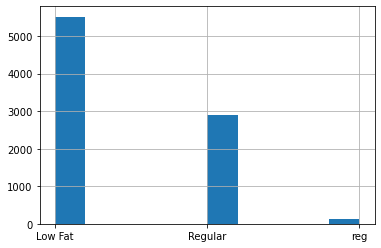

In [43]:


# Create a copy of the original dataframe
train_data_copy = train_data.copy()

# Create a dictionary to map the inconsistent values to a consistent value
fat_content_map = {"LF": "Low Fat", "low fat": "Low Fat"}

# Use the map() function to replace the values in the "Item_Fat_Content" column
train_data_copy["Item_Fat_Content"] = train_data_copy["Item_Fat_Content"].map(fat_content_map).fillna(train_data_copy["Item_Fat_Content"])

# Now check the unique values of "Item_Fat_Content"
print(train_data_copy["Item_Fat_Content"].unique())

# Plot a histogram of the values
train_data_copy["Item_Fat_Content"].hist()


# Modify the change on the original dataframe

['Low Fat' 'Regular']


<AxesSubplot:>

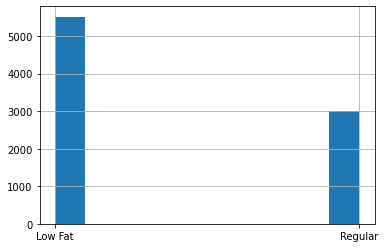

In [46]:
# Replace 'LF' and 'low fat' with 'Low Fat'
train_data["Item_Fat_Content"].replace(to_replace =["LF", "low fat"], value = "Low Fat", inplace=True)

# Verify the changes
print(train_data["Item_Fat_Content"].unique())
train_data["Item_Fat_Content"].hist()


### Clean inconsistent data( reg to regular)

['Low Fat' 'Regular']


<AxesSubplot:>

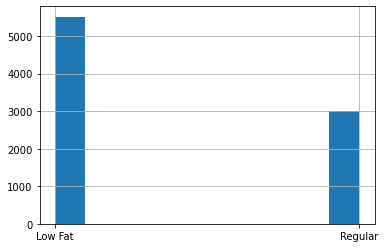

In [47]:
# Create a dictionary to map the inconsistent values to a consistent value
fat_content_map = {"Regular": "Regular", "reg": "Regular"}

# Use the replace() method to replace the values in the "Item_Fat_Content" column
train_data["Item_Fat_Content"].replace(fat_content_map, inplace=True)

# Now check the unique values of "Item_Fat_Content"
print(train_data["Item_Fat_Content"].unique())

# Plot a histogram of the values
train_data["Item_Fat_Content"].hist()


# Show the dataframe

In [48]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Dealing with missing values
### Deleting missing rows

In [49]:
# remove all columns with at least one missing value
train_data = train_data.dropna(axis=0)
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# Check completeness

In [50]:
print ("Total Missing values: " + str(train_data.isnull().sum().sum()))

Total Missing values: 0


### Check consistancy: data is consistance, chick duplicated to see if there are inconsistency data

In [55]:
pd.DataFrame.duplicated(train_data).sum()

0

# Check Acurracy, OUTLIERS

In [54]:
# calculate summary statistics
#data_mean, data_std = dataframe.mean(), std(dataframe)
data_mean = mean(train_data._get_numeric_data())
data_std = std(train_data._get_numeric_data())
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
total_outliers = 0
for i, x in enumerate(train_data):
    if not i == 0:
        print ("Outliers in: " + str(x) + ": ")
        try:
            outliers = train_data[train_data[x] > train_data[x].mean() + 3 * train_data[x].std()]
            print (len(outliers))
            total_outliers += len(outliers)
        except:
            print("0")
#outliers = [x for x in dataframe[] if x < lower or x > upper]
print('Identified outliers: %d' % total_outliers)


Outliers in: Item_Weight: 
0
Outliers in: Item_Fat_Content: 
0
Outliers in: Item_Visibility: 
0
Outliers in: Item_Type: 
0
Outliers in: Item_MRP: 
0
Outliers in: Outlet_Identifier: 
0
Outliers in: Outlet_Establishment_Year: 
0
Outliers in: Outlet_Size: 
0
Outliers in: Outlet_Location_Type: 
0
Outliers in: Outlet_Type: 
0
Outliers in: Item_Outlet_Sales: 
37
Identified outliers: 37


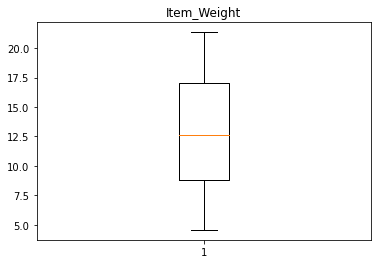

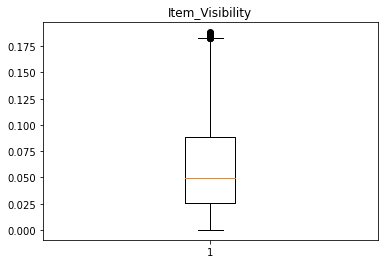

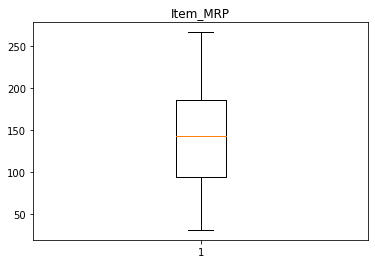

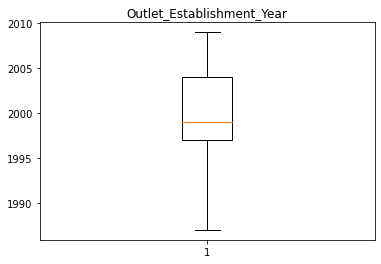

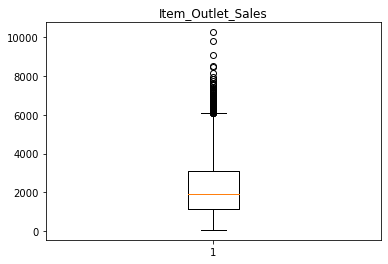

In [57]:


numeric_cols = train_data._get_numeric_data().columns

for col in numeric_cols:
    plt.boxplot(train_data[col])
    plt.title(col)
    plt.show()


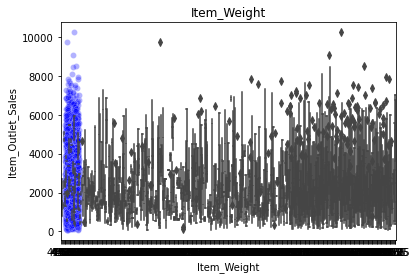

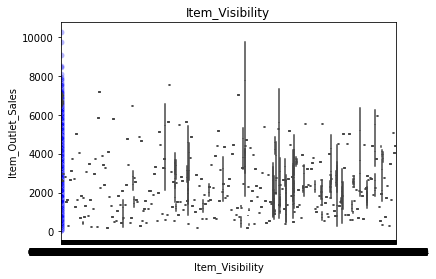

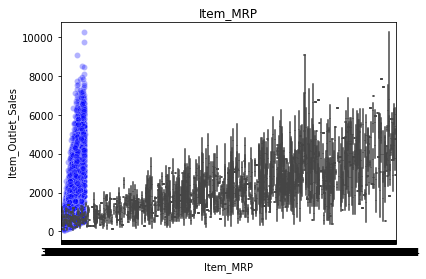

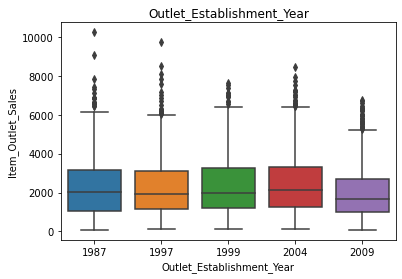

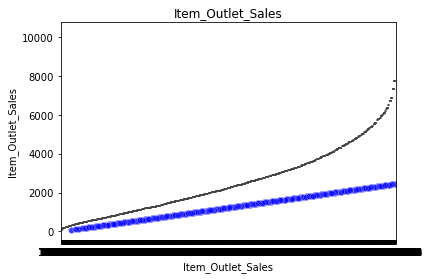

In [59]:
# scatter plot with box plot overlay
for col in numeric_cols:
    sns.scatterplot(data=train_data, x=col, y="Item_Outlet_Sales", color='blue', alpha=0.3)
    sns.boxplot(data=train_data, x=col, y="Item_Outlet_Sales")
    plt.title(col)
    plt.show()


# Item Outlet Sales is not not normnormally disturbuted

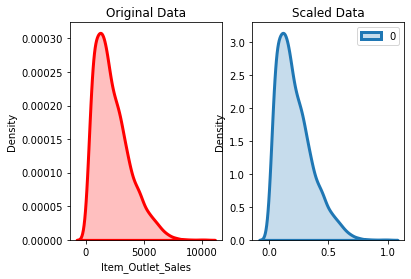

In [56]:


# Assign the column to a variable
col = train_data['Item_Outlet_Sales']

# min-max scale the data between 0 and 1
scaled_data = minmax_scaling(col, columns=[0])

# plot both together to compare
# plot original data as a kernel density estimate
plt.subplot(1, 2, 1)
sns.kdeplot(col, color='r', linewidth=3, shade=True)
plt.title('Original Data')

# plot scaled data as a kernel density estimate
plt.subplot(1, 2, 2)
sns.kdeplot(scaled_data, color='b', linewidth=3, shade=True)
plt.title('Scaled Data')

plt.show()


In [68]:

# Create MinMaxScaler object
scaler = MinMaxScaler()

# Scale the 'Item_Outlet_Sales' column
scaled_sales = scaler.fit_transform(train_data[['Item_Outlet_Sales']])

# Save the scaled values to the original dataset
train_data['Item_Outlet_Sales'] = scaled_sales



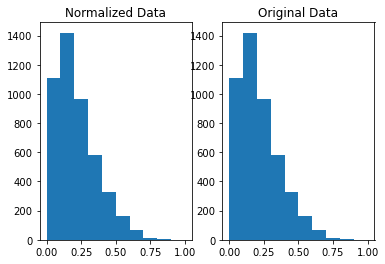

In [69]:

plt.subplot(1, 2, 1)
plt.hist(train_data['Item_Outlet_Sales'])
plt.title('Normalized Data')

plt.subplot(1, 2, 2)
plt.hist(train_data['Item_Outlet_Sales'])
plt.title('Original Data')

plt.show()

# Clean the test data dataframe

In [70]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Display null values

In [71]:
test_data.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5676,False,False,False,False,False,False,False,False,False,False,False
5677,False,False,False,False,False,False,False,False,False,False,False
5678,False,False,False,False,False,False,False,False,True,False,False
5679,False,False,False,False,False,False,False,False,True,False,False


# Count the number of all null values

In [75]:
null = test_data.isnull()
null

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5676,False,False,False,False,False,False,False,False,False,False,False
5677,False,False,False,False,False,False,False,False,False,False,False
5678,False,False,False,False,False,False,False,False,True,False,False
5679,False,False,False,False,False,False,False,False,True,False,False


In [78]:
print ("Total Missing values: " + str(test_data.isnull().sum().sum()))

Total Missing values: 2582


# Dealing with missing values
### Deleting missing rows

In [79]:
# remove all columns with at least one missing value
test_data = train_data.dropna(axis=0)
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.359846
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.036730
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.199072
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,0.090844
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.047840
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,0.347428
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,0.265930
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,0.110320
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.174368


In [84]:
test_data[test_data['Item_Fat_Content']=='Low Fat']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.359846
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.199072
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,0.090844
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,0.142017
14,FDF32,16.350,Low Fat,0.068024,Fruits and Vegetables,196.4426,OUT013,1987,High,Tier 3,Supermarket Type1,0.187308
...,...,...,...,...,...,...,...,...,...,...,...,...
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.147441
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.077511
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,0.265930
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,0.110320


<AxesSubplot:>

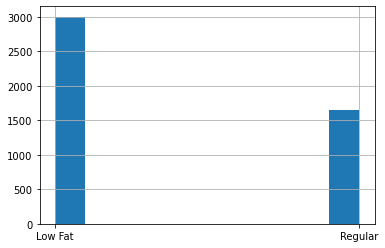

In [86]:

# Plot a histogram of the values
test_data["Item_Fat_Content"].hist()

<AxesSubplot:>

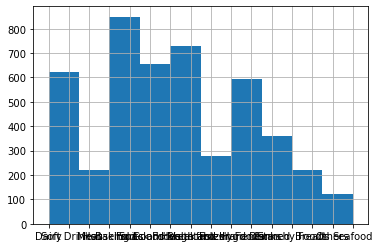

In [87]:

# Plot a histogram of the values
test_data["Item_Type"].hist()

<AxesSubplot:>

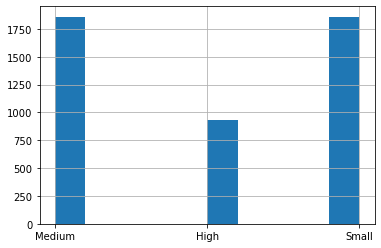

In [88]:

# Plot a histogram of the values
test_data["Outlet_Size"].hist()

<AxesSubplot:>

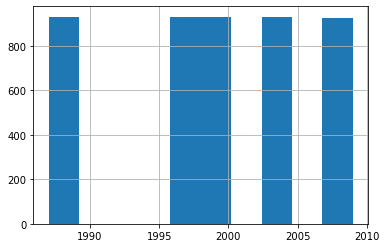

In [89]:

# Plot a histogram of the values
test_data["Outlet_Establishment_Year"].hist()

# Check Acurracy, OUTLIERS

In [92]:
# Check Acurracy, OUTLIERS

# calculate summary statistics
#data_mean, data_std = dataframe.mean(), std(dataframe)
datamean = mean(test_data._get_numeric_data())
datastd = std(test_data._get_numeric_data())
# identify outliers
cutoff = datastd * 3
lower, upper = datamean - cutoff, datamean + cutoff
# identify outliers
totaloutlier = 0
for i, x in enumerate(test_data):
    if not i == 0:
        print ("Outliers in: " + str(x) + ": ")
        try:
            outlier = test_data[test_data[x2] > test_data[x2].mean() + 3 * test_data[x2].std()]
            print (len(outlier))
            totaloutlier += len(outlier)
        except:
            print("0")
#outliers = [x for x in dataframe[] if x < lower or x > upper]
print('Identified outliers: %d' % totaloutlier)


Outliers in: Item_Weight: 
0
Outliers in: Item_Fat_Content: 
0
Outliers in: Item_Visibility: 
0
Outliers in: Item_Type: 
0
Outliers in: Item_MRP: 
0
Outliers in: Outlet_Identifier: 
0
Outliers in: Outlet_Establishment_Year: 
0
Outliers in: Outlet_Size: 
0
Outliers in: Outlet_Location_Type: 
0
Outliers in: Outlet_Type: 
0
Outliers in: Item_Outlet_Sales: 
0
Identified outliers: 0


# Normlize the column 'Sales'

In [93]:

# Create MinMaxScaler object
scale = MinMaxScaler()

# Scale the 'Item_Outlet_Sales' column
scaledsales = scale.fit_transform(test_data[['Item_Outlet_Sales']])

# Save the scaled values to the original dataset
test_data['Item_Outlet_Sales'] = scaled_sales



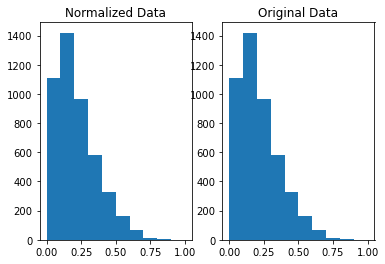

In [94]:

plt.subplot(1, 2, 1)
plt.hist(train_data['Item_Outlet_Sales'])
plt.title('Normalized Data')

plt.subplot(1, 2, 2)
plt.hist(train_data['Item_Outlet_Sales'])
plt.title('Original Data')

plt.show()

# Create linear regression model 

In [97]:
encoding = pd.read_csv('encoding.csv')

Train score:  0.4703598807488447
Test score:  0.4755023477083373
R^2: 0.4755023477083373
Root Mean Squared Error: 1093.2256183433428


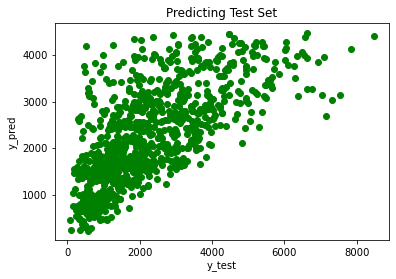

In [101]:
#import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#define the features and target
features = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
target = 'Item_Outlet_Sales'

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoding[features], encoding[target], test_size=0.2, random_state=0)

#create the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#evaluate the model
train_score = lin_reg.score(X_train, y_train)
test_score = lin_reg.score(X_test, y_test)
print("Train score: ", train_score)
print("Test score: ", test_score)

#predicting the test set results
y_pred = lin_reg.predict(X_test)


# evaluate the model
print("R^2: {}".format(lin_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


# Plotting the test set results
plt.scatter(y_test, y_pred, color = 'green')
plt.title('Predicting Test Set')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

